# Limpieza y Visualización de Datos con Pandas y Matplotlib

Para esto, debemos realizar lo siguiente: 

1. Cargar y explorar un dataset.

2. Aplicar técnicas de limpieza usando pandas.

3. Convertir datos (fechas, números, categorías).

4. Visualizar los datos limpios con matplotlib para obtener insights.

### Requerimientos: 
1. Entorno Virtual.
2. Datasets.
3. Librerias: Pandas, sqlite3, Matplotlib.

**Para realizar esto, debemos instalar las siguientes dependencias** 

In [173]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Extración de datos con Pandas
Vamos a utilizar pandas para leer nuestro csv

In [174]:
# importar librerías
import pandas as pd

**Creamos nuestro DF**

En el caso de que nos de un error de decodificación, podriamos utilizar el encoding "ISO-8859-1"

In [190]:
import sqlite3
dataset = pd.read_csv('datasets.csv', on_bad_lines='skip')
df = pd.DataFrame(dataset)

### Explorar el datasets
Ahora debemos utilizar funciones de pandas para poder explorar los tipos de datos que tenemos y obviamente ver si tenemos datos nulos o inservibles. 

In [176]:
print(df.isnull().sum())

Nombre             1
Edad              14
Email              7
Fecha_Registro     0
Ingresos           8
Genero             4
Comentario        24
dtype: int64


In [177]:
print(df.head(20))


            Nombre Edad                Email Fecha_Registro       Ingresos  \
0        Juan Prez   29      juanperez@gmail     2021-03-15         $3,000   
1        Mara Lpez  NaN  m.lopez@outlook.com     15/04/2021           4000   
2       jose lopez  NaN           joselopez@     2021/05/20        3500.00   
3         Ana Gmez   31  ana_gomez@gmail.com     2021-06-01            NaN   
4        Juan Prez   29      juanperez@gmail     2021-03-15         $3,000   
5              NaN   45                  NaN     2021-07-12        5000.50   
6     Lucas Torres   27   lucastorres@correo     2021-08-01           4800   
7        Mara Lpez   30  m.lopez@outlook.com     2021-04-15           4000   
8   Laura Fernndez   26     laura@correo.com     2021-09-01  not available   
9         Jos Lpez   30  joselopez@gmail.com     2021-10-10          3.600   
10      Carlos Daz  NaN           carlos123@     2021/11/01       $4000.00   
11      Sofa Mndez   32                sofa@     01/12/2021     

# Limpieza de Datos
3. **Conversión de Tipos y Estandarización** 

* Edad: Convertir a numérico, usando errors="coerce" para transformar valores inválidos en NaN.

* Fecha_Registro: Convertir las fechas a formato datetime.

* Ingresos: Remover símbolos y convertir a numérico.

* Genero: Estandarizar los valores ("MASCULINO" o "m" a "M", "FEMENINO" o "f" a "F").

* Nombres: Corregir la capitalización y quitar espacios extras.

### Convertir Edad a numérico
Edad: Convertir a numérico con to_numeric() usando errors="coerce" para transformar valores inválidos en NaN.

In [178]:
# Convertir Edad a numérico
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

df['Edad'] = df['Edad'].fillna(df['Edad'].mean())
print(df.head(10))

           Nombre      Edad                Email Fecha_Registro  \
0       Juan Prez  29.00000      juanperez@gmail     2021-03-15   
1       Mara Lpez  30.21875  m.lopez@outlook.com     15/04/2021   
2      jose lopez  30.21875           joselopez@     2021/05/20   
3        Ana Gmez  31.00000  ana_gomez@gmail.com     2021-06-01   
4       Juan Prez  29.00000      juanperez@gmail     2021-03-15   
5             NaN  45.00000                  NaN     2021-07-12   
6    Lucas Torres  27.00000   lucastorres@correo     2021-08-01   
7       Mara Lpez  30.00000  m.lopez@outlook.com     2021-04-15   
8  Laura Fernndez  26.00000     laura@correo.com     2021-09-01   
9        Jos Lpez  30.00000  joselopez@gmail.com     2021-10-10   

        Ingresos     Genero         Comentario  
0         $3,000          M  Cliente frecuente  
1           4000          F  Cliente Frecuente  
2        3500.00          M                NaN  
3            NaN          f                NaN  
4         $3,000 

### Convertir Fecha_Registro a datetime


In [192]:
# Convertir Fecha_Registro a datetime (detecta errores y asigna NaT)
df['Fecha_Registro'] = pd.to_datetime(df['Fecha_Registro'], errors='coerce')
print(df.head(10))


           Nombre Edad                Email Fecha_Registro       Ingresos  \
0       Juan Prez   29      juanperez@gmail     2021-03-15         $3,000   
1       Mara Lpez  NaN  m.lopez@outlook.com            NaT           4000   
2      jose lopez  NaN           joselopez@            NaT        3500.00   
3        Ana Gmez   31  ana_gomez@gmail.com     2021-06-01            NaN   
4       Juan Prez   29      juanperez@gmail     2021-03-15         $3,000   
5             NaN   45                  NaN     2021-07-12        5000.50   
6    Lucas Torres   27   lucastorres@correo     2021-08-01           4800   
7       Mara Lpez   30  m.lopez@outlook.com     2021-04-15           4000   
8  Laura Fernndez   26     laura@correo.com     2021-09-01  not available   
9        Jos Lpez   30  joselopez@gmail.com     2021-10-10          3.600   

      Genero         Comentario  
0          M  Cliente frecuente  
1          F  Cliente Frecuente  
2          M                NaN  
3          f    

### Limpiar columna de ingresos
Para ello, esta vez utilizaremos el siguiente REGEX 
* "[\$,]", "", regex=True

In [180]:
#elimina el $
df['Ingresos'] = df['Ingresos'].str.replace(r"[\$,]", "", regex=True)
df["Ingresos"]= pd.to_numeric(df['Ingresos'],errors='coerce')
print(df.head(10))


           Nombre      Edad                Email Fecha_Registro  Ingresos  \
0       Juan Prez  29.00000      juanperez@gmail     2021-03-15    3000.0   
1       Mara Lpez  30.21875  m.lopez@outlook.com            NaT    4000.0   
2      jose lopez  30.21875           joselopez@            NaT    3500.0   
3        Ana Gmez  31.00000  ana_gomez@gmail.com     2021-06-01       NaN   
4       Juan Prez  29.00000      juanperez@gmail     2021-03-15    3000.0   
5             NaN  45.00000                  NaN     2021-07-12    5000.5   
6    Lucas Torres  27.00000   lucastorres@correo     2021-08-01    4800.0   
7       Mara Lpez  30.00000  m.lopez@outlook.com     2021-04-15    4000.0   
8  Laura Fernndez  26.00000     laura@correo.com     2021-09-01       NaN   
9        Jos Lpez  30.00000  joselopez@gmail.com     2021-10-10       3.6   

      Genero         Comentario  
0          M  Cliente frecuente  
1          F  Cliente Frecuente  
2          M                NaN  
3          f    

In [181]:
df['Ingresos'] = df['Ingresos'].fillna(df['Ingresos'].median())
print(df.head(20))

            Nombre      Edad                Email Fecha_Registro  Ingresos  \
0        Juan Prez  29.00000      juanperez@gmail     2021-03-15    3000.0   
1        Mara Lpez  30.21875  m.lopez@outlook.com            NaT    4000.0   
2       jose lopez  30.21875           joselopez@            NaT    3500.0   
3         Ana Gmez  31.00000  ana_gomez@gmail.com     2021-06-01    3600.0   
4        Juan Prez  29.00000      juanperez@gmail     2021-03-15    3000.0   
5              NaN  45.00000                  NaN     2021-07-12    5000.5   
6     Lucas Torres  27.00000   lucastorres@correo     2021-08-01    4800.0   
7        Mara Lpez  30.00000  m.lopez@outlook.com     2021-04-15    4000.0   
8   Laura Fernndez  26.00000     laura@correo.com     2021-09-01    3600.0   
9         Jos Lpez  30.00000  joselopez@gmail.com     2021-10-10       3.6   
10      Carlos Daz  30.21875           carlos123@            NaT    4000.0   
11      Sofa Mndez  32.00000                sofa@            NaT

### Estandarizar Género
Estandarizar los valores ("MASCULINO" o "m" a "M", "FEMENINO" o "f" a "F").

In [206]:
#Cambia de minuscula a mayuscula
df['Genero'] = df['Genero'].str.upper()
#cambia el masculino/femenino a F y M
df['Genero'] = df['Genero'].replace('MASCULINO',"M")
df['Genero'] = df['Genero'].replace('FEMENINO',"F")
print(df['Genero'])

0            M
1            F
2            M
3            F
4            M
5            M
6            M
7            F
8            F
9            M
10           M
11           F
12           M
13           M
14           M
15           F
16           M
17           F
18           F
19           F
20         NaN
21           M
22           M
23    $4000.00
24         NaN
25           F
26           M
27           M
28           F
29           M
30           M
31           F
32         NaN
33           F
34           M
35           F
36           M
37           M
38           F
39           M
40           M
41         NaN
42           F
43           F
44           M
45           M
46           F
47           M
Name: Genero, dtype: object


### Normalizar Nombres

 Corregir la capitalización y quitar espacios extras.

In [183]:
df['Nombre'] = df['Nombre'].str.strip().str.replace(r'\s+', ' ', regex=True).str.title()
print(df.head())

       Nombre      Edad                Email Fecha_Registro  Ingresos Genero  \
0   Juan Prez  29.00000      juanperez@gmail     2021-03-15    3000.0      M   
1   Mara Lpez  30.21875  m.lopez@outlook.com            NaT    4000.0      F   
2  Jose Lopez  30.21875           joselopez@            NaT    3500.0      M   
3    Ana Gmez  31.00000  ana_gomez@gmail.com     2021-06-01    3600.0      F   
4   Juan Prez  29.00000      juanperez@gmail     2021-03-15    3000.0      M   

          Comentario  
0  Cliente frecuente  
1  Cliente Frecuente  
2                NaN  
3                NaN  
4  Cliente frecuente  


### Manejo de Valores Nulos
Ahora debemos buscar los valores nulos actuales.

In [184]:
isNull = df.isnull().sum()
print(isNull)

Nombre             1
Edad               0
Email              7
Fecha_Registro    16
Ingresos           0
Genero             4
Comentario        24
dtype: int64


**Podriamos aplicar metodos como imputación en columnas claves, tales como en edad o ingresos**

Imputar significa reemplazar datos faltantes (NaN) con un valor estimado para evitar perder información o eliminar filas completas.

¿Por qué usar la mediana?
La mediana es resistente a valores extremos. Si tenés un dato raro como una edad de 120 años, no va a afectar tanto como afectaría el promedio.

In [185]:
import pandas as pd
df = pd.DataFrame({'a': [1, None, 3]})
print(df.fillna(0))


     a
0  1.0
1  0.0
2  3.0


¿Por qué usar la media acá?
En ingresos, muchas veces la distribución no es tan sesgada como en edades (aunque podría serlo), así que la media es una buena primera aproximación

### Matplotlib
Matplotlib es una biblioteca de visualización de datos para el lenguaje de programación Python. Se utiliza principalmente para crear gráficos estáticos, interactivos y animados en dos dimensiones (2D), aunque tiene algunas capacidades básicas en 3D.
Matplotlib está mayormente escrito en Python, pero también incluye componentes en C, C++ y Objective-C (para algunas partes del renderizado y para integrarse con diferentes backends gráficos como Agg, Qt, GTK, etc.).

### Histograma de Edades con matplotlib

Este gráfico permite ver la distribución de la edad de los clientes.

Puntos a resaltar:

Uso de dropna() para evitar problemas con valores faltantes.

Configuración de etiquetas, título y estilo.

### Serie Temporal de Registros
Visualizar la evolución de registros en el tiempo, usando la fecha de registro.

Puntos a resaltar:

Agrupar por fechas y visualizar tendencias temporales.

La importancia de formatear fechas y ajustar la visualización.

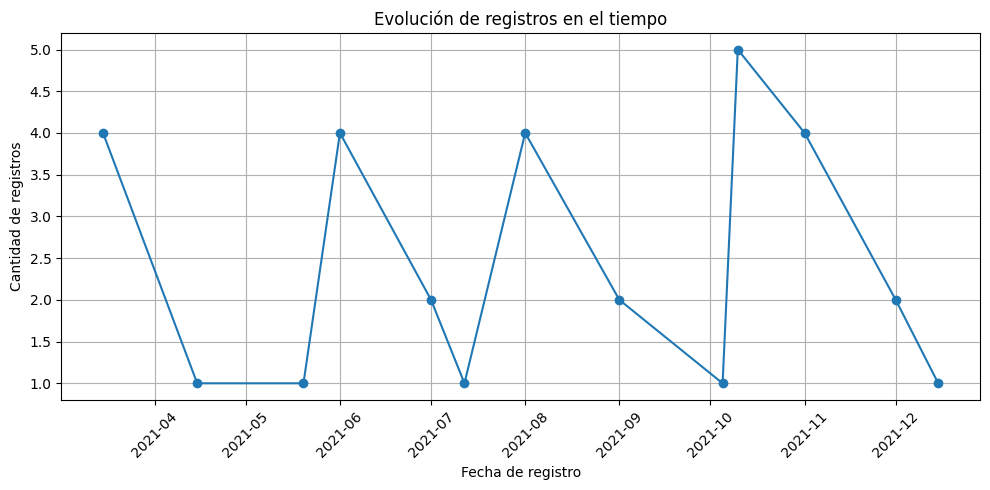

In [193]:
registro_por_fecha = df.groupby(df['Fecha_Registro'].dt.date).size()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(registro_por_fecha.index, registro_por_fecha.values, marker='o', linestyle='-')
plt.title('Evolución de registros en el tiempo')
plt.xlabel('Fecha de registro')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




### Otros Gráficos Opcionales
Para enriquecer la clase, puedes proponer ejercicios adicionales como:

Gráfico de dispersión: Relacionar Edad vs. Ingresos para ver posibles tendencias.

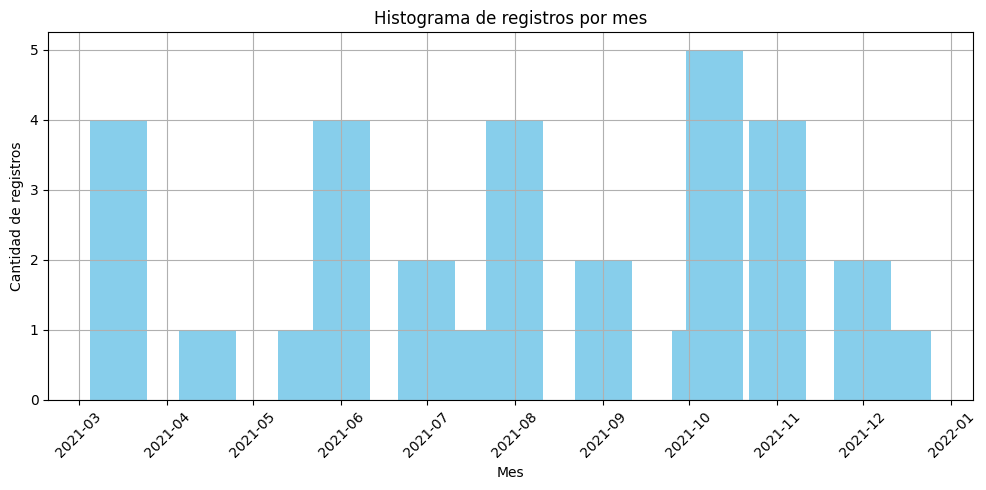

In [ ]:
registro_por_fecha = df.groupby(df['Fecha_Registro'].dt.date).size()
import matplotlib.pyplot as plt
# Agrupar por mes (podés cambiar a 'D' para días, 'W' para semanas)
conteo_por_mes = df.groupby(df['Fecha_Registro'].dt.to_period('D')).size()

# Convertir el índice a timestamp para graficar
conteo_por_mes.index = conteo_por_mes.index.to_timestamp()

# Graficar como histograma de barras (porque son fechas categóricas)
plt.figure(figsize=(9, 5))
plt.bar(conteo_por_mes.index, conteo_por_mes.values, width=20, color='skyblue')
plt.title('Histograma de registros por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Gráfico de pastel: Proporción de clientes por género.

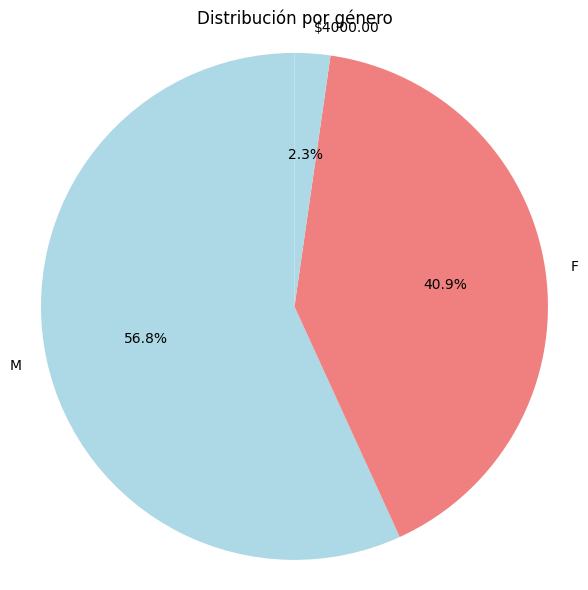

In [205]:
conteo_por_genero = df['Genero'].value_counts()



plt.figure(figsize=(6, 6))
plt.pie(
    conteo_por_genero,
    labels=conteo_por_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightcoral']  # Personalizá colores
)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo esté bien proporcionado
plt.tight_layout()
plt.show()
